<a href="https://colab.research.google.com/github/Pkodeboy/64061_AML/blob/main/Assignment%204/Pranay_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==2.12

In [ ]:



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!pip install keras-preprocessing



#Installing Packages required for deep learning

from tensorflow import keras
from keras import layers
from keras import preprocessing
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import load_model

from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop
from keras.optimizers import adam
from google.colab import files
import re, os




In [ ]:
import logging


logging.getLogger('tensorflow').disabled = True


**Loading the dataset with reviews truncated after 150 words, limiting training samples to 100, validating on 10,000 samples, and considering only the top 10,000 words.**

In [ ]:
# Cutoff reviews after 150 words
max_len = 150

# Restrict training samples to 100
num_train_samples = 100

# Validate on 10,000 samples
num_val_samples = 10000

# Consider only the top 10,000 words
num_words = 10000

(x_train, y_train), (x_val, y_val) = imdb.load_data(num_words=num_words)

x_train = keras.preprocessing.sequence.pad_sequences(
    x_train, maxlen=max_len)
x_val = keras.preprocessing.sequence.pad_sequences(
    x_val, maxlen=max_len)


In [ ]:
# First we code the Embedding layer
model_embedding = keras.Sequential([
    layers.Embedding(num_words, 10, input_length=max_len),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Model compilattion
model_embedding.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
model_embedding.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 10)           100000    
                                                                 
 flatten (Flatten)           (None, 1500)              0         
                                                                 
 dense (Dense)               (None, 1)                 1501      
                                                                 
Total params: 101,501
Trainable params: 101,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Callbacks
callbacks = ModelCheckpoint(
            filepath= "model_embedding1.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Running the Model using model_embedding.fit
Model_embedded = model_embedding.fit(x_train, y_train,
                    epochs=30,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=callbacks)

Epoch 1/30
1250/1250 [==============================] - 5s 3ms/step - loss: 0.5528 - acc: 0.7169 - val_loss: 0.3620 - val_acc: 0.8462
Epoch 2/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2928 - acc: 0.8803 - val_loss: 0.3157 - val_acc: 0.8632
Epoch 3/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2370 - acc: 0.9053 - val_loss: 0.3093 - val_acc: 0.8696
Epoch 4/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.2046 - acc: 0.9219 - val_loss: 0.3106 - val_acc: 0.8742
Epoch 5/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1773 - acc: 0.9336 - val_loss: 0.3217 - val_acc: 0.8738
Epoch 6/30
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1536 - acc: 0.9442 - val_loss: 0.3355 - val_acc: 0.8678
Epoch 7/30
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1289 - acc: 0.9539 - val_loss: 0.3574 - val_acc: 0.8602
Epoch 8/30
1250/1250 [==============================] - 2s 2ms

In [ ]:
# Printing the measures
print(Model_embedded.history.keys())


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


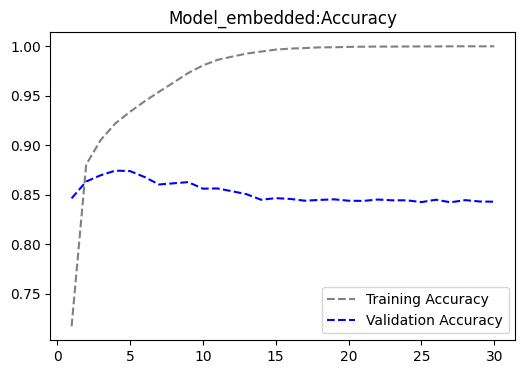

<Figure size 640x480 with 0 Axes>

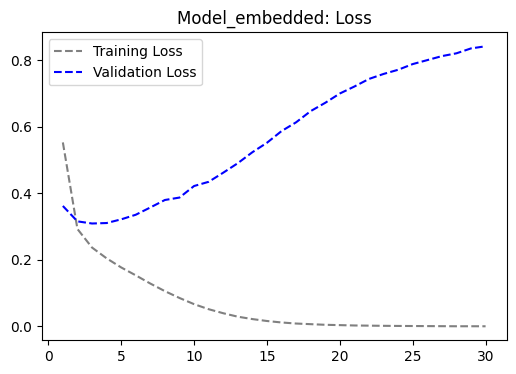

In [ ]:
#'acc' is the representation for accuracy
accuracy = Model_embedded.history['acc']
val_accuracy = Model_embedded.history['val_acc']

loss = Model_embedded.history["loss"]
val_loss = Model_embedded.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_embedded:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_embedded: Loss")
plt.legend()
plt.show()

**Training Accuracy and Loss: The training accuracy progressively rises and eventually stabilizes at 100%, while the training loss substantially decreases, indicating effective learning from the training data. Validation Accuracy and Loss: The validation accuracy remains consistently high, stabilizing at approximately 86%, indicating robust generalization to unseen data. The validation loss converges to a stable value, suggesting that the model is not overfitting the training data. Overall Performance: Both the accuracy and loss plots for both training and validation demonstrate that the model is effectively learning and generalizing to new data.**

In [ ]:
Model_embedded_validate = load_model('model_embedding1.keras')
Model1_Results = Model_embedded_validate.evaluate(x_val,y_val)
print(f'Loss: {Model1_Results[0]:.3f}')
print(f'Accuracy: {Model1_Results[1]:.3f}')

782/782 [==============================] - 1s 1ms/step - loss: 0.3024 - acc: 0.8724
Loss: 0.302
Accuracy: 0.872


**According to the embedded layer, approximately 87.2% of the remaining dataset samples were accurately classified. In the preceding model, the data has not been divided into sample sizes yet; instead, all available data was utilized, resulting in an accuracy of 87%.**

**Model_embedded_200: Modifying the number of training samples to assess variations in the model's performance. Training set size = 200.**

In [ ]:
# Establishing the maximum limit for the vocabulary's word count.
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Merging Training and Testing data
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=200, test_size=10000, random_state=42, stratify=labels)

# Split the data further to obtain a test size of 5000 samples.
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

In [ ]:
train_texts.shape



(200, 150)

In [ ]:
val_texts.shape

(10000, 150)

In [ ]:
test_texts.shape

(5000, 150)

In [ ]:

# Define the model
embedding_dim = 10

model_embedding_200 = keras.Sequential([
    layers.Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_embedding_200.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])



In [ ]:
model_embedding_200.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 10)           100000    
                                                                 
 flatten_1 (Flatten)         (None, 1500)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1501      
                                                                 
Total params: 101,501
Trainable params: 101,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Callbacks
callbacks = ModelCheckpoint(
            filepath= "model_embedding_200.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Running the Model using model_embedding.fit
model_embedding_200 = model_embedding_200.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=callbacks)

Epoch 1/30
10/10 [==============================] - 1s 20ms/step - loss: 0.6936 - acc: 0.4750 - val_loss: 0.6889 - val_acc: 0.6000
Epoch 2/30
10/10 [==============================] - 0s 4ms/step - loss: 0.6638 - acc: 0.9250 - val_loss: 0.6890 - val_acc: 0.5750
Epoch 3/30
10/10 [==============================] - 0s 4ms/step - loss: 0.6400 - acc: 0.9625 - val_loss: 0.6890 - val_acc: 0.5500
Epoch 4/30
10/10 [==============================] - 0s 6ms/step - loss: 0.6147 - acc: 0.9563 - val_loss: 0.6890 - val_acc: 0.5000
Epoch 5/30
10/10 [==============================] - 0s 6ms/step - loss: 0.5868 - acc: 0.9688 - val_loss: 0.6892 - val_acc: 0.4750
Epoch 6/30
10/10 [==============================] - 0s 6ms/step - loss: 0.5563 - acc: 0.9625 - val_loss: 0.6893 - val_acc: 0.4500
Epoch 7/30
10/10 [==============================] - 0s 6ms/step - loss: 0.5227 - acc: 0.9688 - val_loss: 0.6894 - val_acc: 0.4500
Epoch 8/30
10/10 [==============================] - 0s 6ms/step - loss: 0.4872 - acc: 0.9

In [ ]:
# Print the keys
print(model_embedding_200.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


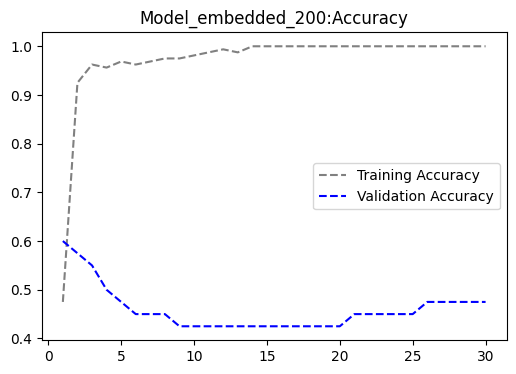

<Figure size 640x480 with 0 Axes>

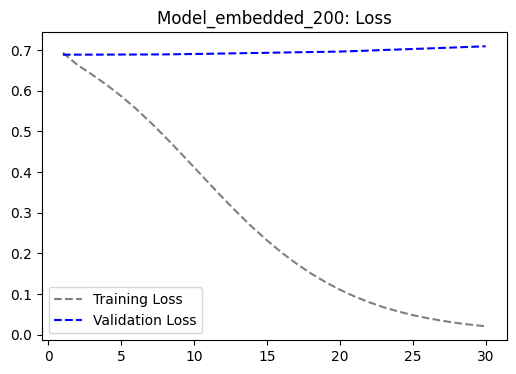

In [ ]:
# 'acc' is the representation for accuracy
accuracy = model_embedding_200.history['acc']
val_accuracy = model_embedding_200.history['val_acc']

loss = model_embedding_200.history["loss"]
val_loss = model_embedding_200.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_embedded_200:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_embedded_200: Loss")
plt.legend()
plt.show()

**Model_embedded_500: To see changes in the model's performance, change its number of training samples. Size of training set: 500.**

In [ ]:
# Establishing the maximum limit for the vocabulary's word count.
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Creating a unified dataset by merging the training and testing data.
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Dividing the data into training and validation samples.
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=500, test_size=10000, random_state=42, stratify=labels)

# Split the data further to obtain a test size of 5000 samples.
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)


In [ ]:

train_texts.shape


(500, 150)

In [ ]:
val_texts.shape


(10000, 150)

In [ ]:
test_texts.shape

(5000, 150)

In [ ]:
# Using embedding model with dimension = 10
embedding_dim = 10

model_embedding_500 = keras.Sequential([
    layers.Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

# Model compilling
model_embedding_500.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model_embedding_500.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 10)           100000    
                                                                 
 flatten_2 (Flatten)         (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1501      
                                                                 
Total params: 101,501
Trainable params: 101,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# Callbacks
callbacks = ModelCheckpoint(
            filepath= "model_embedding_500.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Running the Model using model_embedding.fit
model_embedding_500 = model_embedding_500.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=callbacks)

Epoch 1/30
25/25 [==============================] - 1s 9ms/step - loss: 0.6917 - acc: 0.5250 - val_loss: 0.6927 - val_acc: 0.5000
Epoch 2/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6643 - acc: 0.8650 - val_loss: 0.6915 - val_acc: 0.5100
Epoch 3/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6369 - acc: 0.9200 - val_loss: 0.6903 - val_acc: 0.5400
Epoch 4/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6035 - acc: 0.9425 - val_loss: 0.6889 - val_acc: 0.5500
Epoch 5/30
25/25 [==============================] - 0s 4ms/step - loss: 0.5630 - acc: 0.9550 - val_loss: 0.6874 - val_acc: 0.5800
Epoch 6/30
25/25 [==============================] - 0s 4ms/step - loss: 0.5164 - acc: 0.9600 - val_loss: 0.6863 - val_acc: 0.5700
Epoch 7/30
25/25 [==============================] - 0s 4ms/step - loss: 0.4649 - acc: 0.9650 - val_loss: 0.6849 - val_acc: 0.5700
Epoch 8/30
25/25 [==============================] - 0s 3ms/step - loss: 0.4106 - acc: 0.97

In [ ]:
 # display of keys
print(model_embedding_500.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


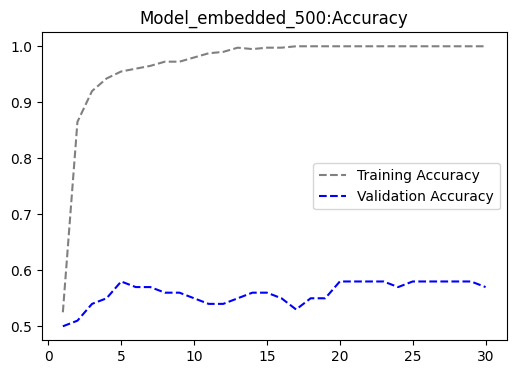

<Figure size 640x480 with 0 Axes>

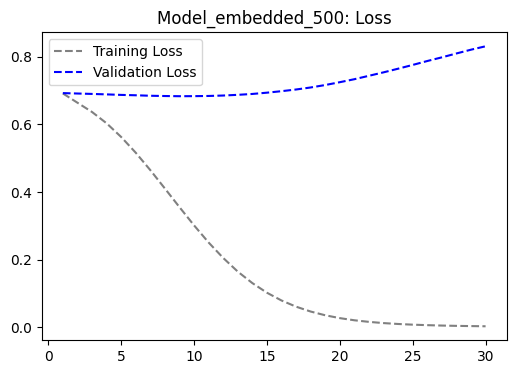

In [ ]:

# 'acc' is the representation for accuracy
accuracy = model_embedding_500.history['acc']
val_accuracy = model_embedding_500.history['val_acc']

loss = model_embedding_500.history["loss"]
val_loss = model_embedding_500.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_embedded_500:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_embedded_500: Loss")
plt.legend()
plt.show()

**Model_embedded_1000: To assess differences in the model's performance, change the amount of training samples. The size of the training set is 1000.**

In [ ]:
# Establishing the maximum number of words to utilize in the vocabulary.
num_words = 10000

# Load the IMDB dataset.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Truncate the reviews after 150 words.
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Merging the training and testing data forms a unified dataset.
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Dividing the data into training and validation sets.
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=1000, test_size=10000, random_state=42, stratify=labels)

# Split the data further to obtain a test size of 5000 samples.
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)



In [ ]:
train_texts.shape


(1000, 150)

In [ ]:
val_texts.shape


(10000, 150)

In [ ]:
test_texts.shape



(5000, 150)

In [ ]:
# Using embedding model with dimension = 10
embedding_dim = 10

model_embedding_1000 = keras.Sequential([
    layers.Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

# Model compilling
model_embedding_1000.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# callbacks.
callbacks = ModelCheckpoint(
            filepath= "model_embedding_1000.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


In [ ]:

# Summary of results
model_embedding_1000.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 10)           100000    
                                                                 
 flatten_3 (Flatten)         (None, 1500)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1501      
                                                                 
Total params: 101,501
Trainable params: 101,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Running the Model using model_embedding.fit
model_embedding_1000 = model_embedding_1000.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=callbacks)



Epoch 1/30
50/50 [==============================] - 1s 9ms/step - loss: 0.6942 - acc: 0.4775 - val_loss: 0.6922 - val_acc: 0.5450
Epoch 2/30
50/50 [==============================] - 0s 5ms/step - loss: 0.6689 - acc: 0.8338 - val_loss: 0.6912 - val_acc: 0.5550
Epoch 3/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6381 - acc: 0.9575 - val_loss: 0.6897 - val_acc: 0.5450
Epoch 4/30
50/50 [==============================] - 0s 3ms/step - loss: 0.5956 - acc: 0.9613 - val_loss: 0.6878 - val_acc: 0.5550
Epoch 5/30
50/50 [==============================] - 0s 3ms/step - loss: 0.5405 - acc: 0.9725 - val_loss: 0.6851 - val_acc: 0.5600
Epoch 6/30
50/50 [==============================] - 0s 3ms/step - loss: 0.4755 - acc: 0.9900 - val_loss: 0.6818 - val_acc: 0.5750
Epoch 7/30
50/50 [==============================] - 0s 3ms/step - loss: 0.4043 - acc: 0.9912 - val_loss: 0.6782 - val_acc: 0.6000
Epoch 8/30
50/50 [==============================] - 0s 3ms/step - loss: 0.3324 - acc: 0.99

In [ ]:
 # Printing keys
print(model_embedding_1000.history.keys())


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


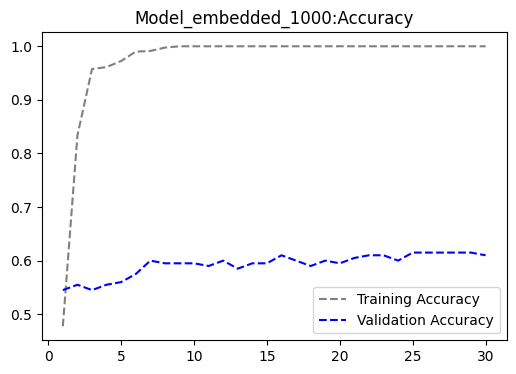

<Figure size 640x480 with 0 Axes>

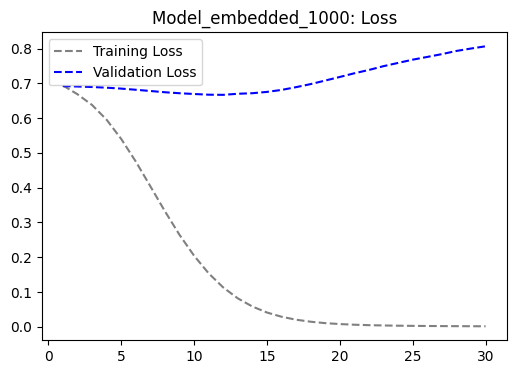

In [ ]:
# 'acc' is the representation for accuracy
accuracy = model_embedding_1000.history['acc']
val_accuracy = model_embedding_1000.history['val_acc']

loss = model_embedding_1000.history["loss"]
val_loss = model_embedding_1000.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_embedded_1000:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_embedded_1000: Loss")
plt.legend()
plt.show()

**Model_embedded_2000: adjusting the quantity of training samples to see how it affects the model's efficiency. The size of the training set is set to 2000.**

In [ ]:
# Establishing the maximum number of words to include in the vocabulary.
num_words = 10000

# Loading the IMDB dataset.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Truncate the reviews after 150 words.
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Merging the training and testing data forms a unified dataset.
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Dividing the data into training and validation samples.
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=2000, test_size=10000, random_state=42, stratify=labels)

# Split the data further to obtain a test size of 5000 samples.
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)


In [ ]:

train_texts.shape



(2000, 150)

In [ ]:
val_texts.shape


(10000, 150)

In [ ]:
test_texts.shape

(5000, 150)

In [ ]:

# Using embedding model with dimension = 10
embedding_dim = 10

model_embedding_2000 = keras.Sequential([
    layers.Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])



In [ ]:
# Model compilling
model_embedding_2000.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])



# Summary of results
model_embedding_2000.summary()

# callbacks.
callbacks = ModelCheckpoint(
            filepath= "model_embedding_2000.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Running the Model using model_embedding.fit
model_embedding_2000 = model_embedding_2000.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=callbacks)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 10)           100000    
                                                                 
 flatten_4 (Flatten)         (None, 1500)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1501      
                                                                 
Total params: 101,501
Trainable params: 101,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
100/100 [==============================] - 1s 4ms/step - loss: 0.6928 - acc: 0.5088 - val_loss: 0.6926 - val_acc: 0.5025
Epoch 2/30
100/100 [==============================] - 0s 3ms/step - loss: 0.6655 - acc: 0.7975 - val_loss: 0.6889 - val_acc: 0.5475
Epoch 3/30
100/100 [============================

In [ ]:

 # printing the keys
print(model_embedding_2000.history.keys())




dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


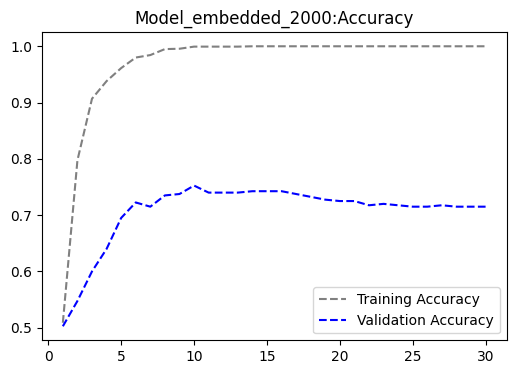

<Figure size 640x480 with 0 Axes>

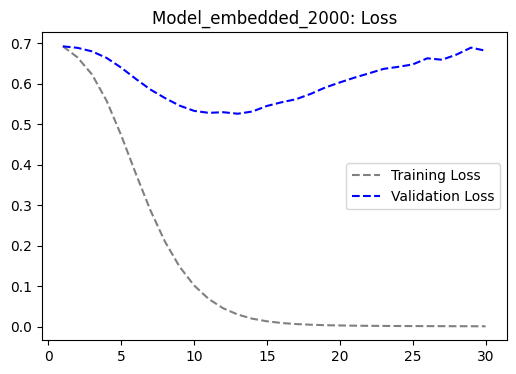

In [ ]:
# 'acc' is the representation for accuracy
accuracy = model_embedding_2000.history['acc']
val_accuracy = model_embedding_2000.history['val_acc']

loss = model_embedding_2000.history["loss"]
val_loss = model_embedding_2000.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_embedded_2000:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_embedded_2000: Loss")
plt.legend()
plt.show()

**High accuracy might be achieved rather quickly which is an indication of overfitting, especially for sample sizes that are much smaller. We need to check whether the models have good generalization ability to deal with unseen data. Pair the validation accuracy and make use of another test set for final assessment. Following the trend, increasing the sample size seems to support generalization, with the model 3 having slower, but more consistent convergence.**

**Utilizing Embedding and Conv1D for Reliable IMDB Classification**

In [ ]:
# Establishing the maximum number of words to utilize in the vocabulary.
num_words = 10000

# Loading the IMDB dataset.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Limit the reviews to 150 words
maxlen = 150

# Padding the sequences to reach the maximum length.
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Merge the training and testing data to form a comprehensive dataset.
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Partitioning the data into training and validation samples.
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=100, test_size=10000, random_state=42, stratify=labels)

# Divide the validation data further to obtain a test size of 5000 samples.
val_texts, test_texts, val_labels, test_labels = train_test_split(val_texts, val_labels, test_size=5000, random_state=42, stratify=val_labels)

In [ ]:
print("Shape of Training Data:", train_texts.shape)
print("Shape of Validation Data:", val_texts.shape)
print("Shape of Test Data:", test_texts.shape)

Shape of Training Data: (100, 150)
Shape of Validation Data: (5000, 150)
Shape of Test Data: (5000, 150)


In [ ]:
# Defining the model utilizing both Embedding and Conv1D layers.( Pretrained word embedding)
embedding_dim = 10
filter_size = 3
num_filters = 32

model = Sequential([
    # Transforming words into vectors using the embedding layer.
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),

    # Utilizing a convolutional layer to extract features from sequences of words.
    Conv1D(filters=num_filters, kernel_size=filter_size, activation='relu'),

    # Max-pooling layer utilized for dimensionality reduction.
    MaxPooling1D(pool_size=2),

    # The Flatten layer is used to transform the 1D output into a 2D tensor.
    Flatten(),

    # Dense layer utilizing sigmoid activation for binary classification.
    Dense(1, activation='sigmoid')
])

In [ ]:

# Model compilling using model.compile()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Moodel training using model.fit()
history = model.fit(train_texts, train_labels, epochs=30, batch_size=16, validation_data=(val_texts, val_labels))

# Printing the accuracy metrices
test_loss, test_acc = model.evaluate(test_texts, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/30
7/7 [==============================] - 1s 134ms/step - loss: 0.6946 - acc: 0.4900 - val_loss: 0.6931 - val_acc: 0.5030
Epoch 2/30
7/7 [==============================] - 1s 110ms/step - loss: 0.6789 - acc: 0.6900 - val_loss: 0.6931 - val_acc: 0.5036
Epoch 3/30
7/7 [==============================] - 1s 111ms/step - loss: 0.6663 - acc: 0.9700 - val_loss: 0.6933 - val_acc: 0.5008
Epoch 4/30
7/7 [==============================] - 1s 110ms/step - loss: 0.6511 - acc: 0.8100 - val_loss: 0.6930 - val_acc: 0.5050
Epoch 5/30
7/7 [==============================] - 1s 111ms/step - loss: 0.6344 - acc: 0.9200 - val_loss: 0.6938 - val_acc: 0.5006
Epoch 6/30
7/7 [==============================] - 1s 87ms/step - loss: 0.6174 - acc: 0.9900 - val_loss: 0.6929 - val_acc: 0.5098
Epoch 7/30
7/7 [==============================] - 1s 91ms/step - loss: 0.5933 - acc: 1.0000 - val_loss: 0.6931 - val_acc: 0.5086
Epoch 8/30
7/7 [==============================] - 1s 86ms/step - loss: 0.5677 - acc: 1.0000 

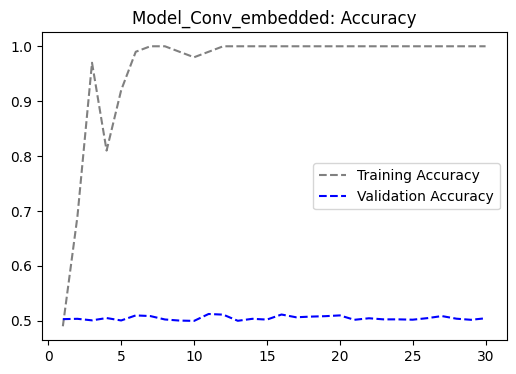

<Figure size 640x480 with 0 Axes>

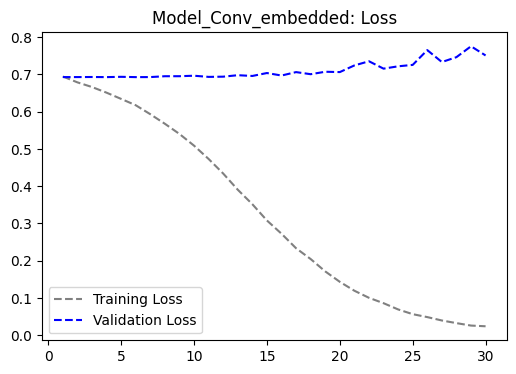

In [ ]:
# Retrieve accuracy and loss values from the history object.
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,

len(accuracy) + 1)

plt.figure(figsize=(6, 4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Model_Conv_embedded: Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6, 4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_Conv_embedded: Loss")
plt.legend()
plt.show()

**A neural network model with both Embedding and Conv1D layers seems to be suffering from the problem of an overfit, this can be caused by the network complexity and the smaller size of our dataset. Incorporate simple architectural designs or use dropout approach to achieve regularization.**

**Conv1D and Embedding layers are employed, with change in embedding dimensions.**

In [ ]:


# Establishing the maximum vocabulary size.
num_words = 10000

# Loading the dataset from IMDB.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Truncate the reviews after 150 words.
maxlen = 150

# Padding the sequences to reach the maximum length.
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Merge the training and testing data to form a unified dataset.
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Separating the data into training and validation samples.
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=100, test_size=10000, random_state=42, stratify=labels)

# Split the validation data further to obtain a test size of 5000 samples.
val_texts, test_texts, val_labels, test_labels = train_test_split(val_texts, val_labels, test_size=5000, random_state=42, stratify=val_labels)


In [ ]:

print("Shape of Training Data:", train_texts.shape)
print("Shape of Validation Data:", val_texts.shape)
print("Shape of Test Data:", test_texts.shape)



Shape of Training Data: (100, 150)
Shape of Validation Data: (5000, 150)
Shape of Test Data: (5000, 150)


In [ ]:
# # Defining the model utilizing both Embedding and Conv1D layers.( Pretrained word embedding)
embedding_dim = 50  # Enlarge the dimensions of embedding vectors.
filter_size = 3
num_filters = 32

model = Sequential([
    # An embedding layer for converting words into vectors.
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),

    # Utilizing a convolutional layer for extracting features from sequences of words.
    Conv1D(filters=num_filters, kernel_size=filter_size, activation='relu'),

    # Utilizing a max-pooling layer for dimensionality reduction.
    MaxPooling1D(pool_size=2),

    # The Flatten layer is utilized to transform the 1D output into a 2D tensor.
    Flatten(),

    # A dense layer employing sigmoid activation for binary classification.
    Dense(1, activation='sigmoid')
])



In [ ]:
# Model compilling using the RMSprop optimizer.
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

# Incorporate early stopping as a measure to prevent overfitting.
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model training
history = model.fit(train_texts, train_labels, epochs=30, batch_size=16, validation_data=(val_texts, val_labels), callbacks=[early_stopping])



Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


7/7 [==============================] - 1s 138ms/step - loss: 0.6947 - acc: 0.4900 - val_loss: 0.6932 - val_acc: 0.4940
Epoch 2/30
7/7 [==============================] - 1s 111ms/step - loss: 0.6874 - acc: 0.6000 - val_loss: 0.6932 - val_acc: 0.4928
Epoch 3/30
7/7 [==============================] - 1s 109ms/step - loss: 0.6826 - acc: 0.6700 - val_loss: 0.6932 - val_acc: 0.4978
Epoch 4/30
7/7 [==============================] - 1s 113ms/step - loss: 0.6787 - acc: 0.8200 - val_loss: 0.6931 - val_acc: 0.4980
Epoch 5/30
7/7 [==============================] - 1s 107ms/step - loss: 0.6744 - acc: 0.8600 - val_loss: 0.6932 - val_acc: 0.4962
Epoch 6/30
7/7 [==============================] - 1s 113ms/step - loss: 0.6704 - acc: 0.8800 - val_loss: 0.6931 - val_acc: 0.4984
Epoch 7/30
7/7 [==============================] - 1s 113ms/step - loss: 0.6668 - acc: 0.9400 - val_loss: 0.6930 - val_acc: 0.4986
Epoch 8/30
7/7 [==============================] - 1s 109ms/step - loss: 0.6632 - acc: 0.9600 - val_lo

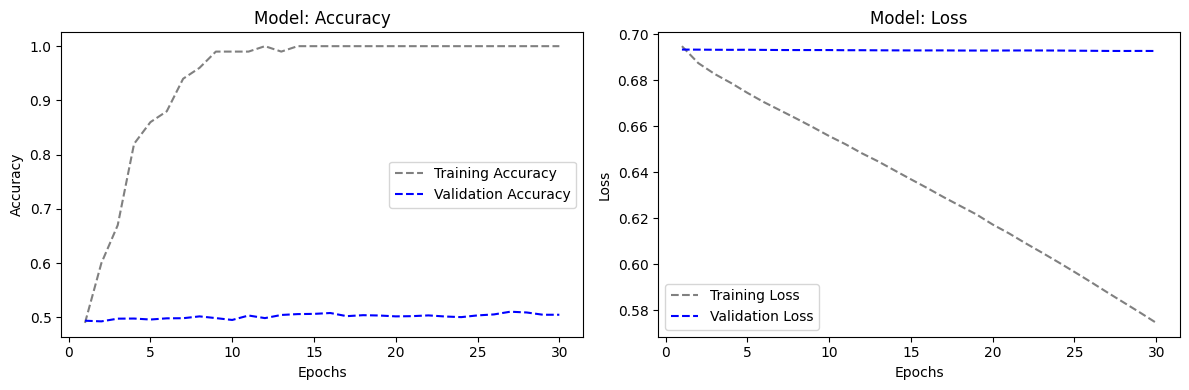

157/157 [==============================] - 1s 4ms/step - loss: 0.6924 - acc: 0.5208
Test Loss: 0.6924
Test Accuracy: 52.08%


In [ ]:
# Retrieve accuracy and loss values from the history object.
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Visualizing the training and validation curves.
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Model: Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model: Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Printing the values of Test
test_loss, test_accuracy = model.evaluate(test_texts, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


**In this scenario, we've enhanced the embedding vector size to 50, offering a more refined representation of the word. Additionally, a filter size of 3 with 32 filters is employed for feature extraction within the convolutional layers. The RMSprop optimizer is utilized with a learning rate set at 1e-4.**

**The training accuracy commences at 49%, as anticipated with random initialization. As epochs progress, it steadily improves to approximately 100%, indicating the model's learning from the training data. Both training and validation losses consistently decrease across epochs, signifying the model's adaptation to the training data. Nevertheless, the minor discrepancy in accuracy between the training and validation sets implies potential overfitting.**

In [ ]:
# Establishing the maximum number of words to include in the vocabulary.
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut off the reviews after 150 words
maxlen = 150

# Please pad the sequences to the specified maximum length.
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Merge the training and testing data to form a comprehensive dataset.
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Partitioning the data into training and validation samples.
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=3500, test_size=10000, random_state=42, stratify=labels)

# Additionally, divide the validation data to yield a test size of 5000 samples.
val_texts, test_texts, val_labels, test_labels = train_test_split(val_texts, val_labels, test_size=5000, random_state=42, stratify=val_labels)


In [ ]:

print("Shape of Training Data:", train_texts.shape)
print("Shape of Validation Data:", val_texts.shape)
print("Shape of Test Data:", test_texts.shape)


Shape of Training Data: (3500, 150)
Shape of Validation Data: (5000, 150)
Shape of Test Data: (5000, 150)


In [ ]:

# Specify the model utilizing both Embedding and Conv1D layers.
embedding_dim = 50  # Enlarge the dimensions of embedding vectors.
filter_size = 5  # Augment the filter size to capture broader global features.
num_filters = 64  # Augment the quantity of filters.

model = Sequential([
    # Embedding layer for word-to-vector conversion.
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),

    # Convolutional layer for feature extraction from word sequences.
    Conv1D(filters=num_filters, kernel_size=filter_size, activation='relu'),

    # Utilizing a max-pooling layer for dimensionality reduction.
    MaxPooling1D(pool_size=2),

    # The Flatten layer is utilized to transform the 1D output into a 2D tensor.
    Flatten(),

    # A dense layer with a sigmoid activation function for binary classification.
    Dense(1, activation='sigmoid')
])



In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
# Compile the model using the Adam optimizer with a reduced learning rate.
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

# Implement early stopping as a preventive measure against overfitting.
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Proceed with training the model.
history = model.fit(train_texts, train_labels, epochs=30, batch_size=16, validation_data=(val_texts, val_labels), callbacks=[early_stopping])



Epoch 1/30
219/219 [==============================] - 4s 17ms/step - loss: 0.6673 - acc: 0.5800 - val_loss: 0.5044 - val_acc: 0.7710
Epoch 2/30
219/219 [==============================] - 5s 21ms/step - loss: 0.3018 - acc: 0.8797 - val_loss: 0.3940 - val_acc: 0.8286
Epoch 3/30
219/219 [==============================] - 4s 16ms/step - loss: 0.0638 - acc: 0.9829 - val_loss: 0.5071 - val_acc: 0.8220
Epoch 4/30
219/219 [==============================] - 4s 16ms/step - loss: 0.0123 - acc: 0.9986 - val_loss: 0.5528 - val_acc: 0.8294
Epoch 5/30
219/219 [==============================] - 6s 26ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.6090 - val_acc: 0.8294
Epoch 6/30
219/219 [==============================] - 4s 16ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.6476 - val_acc: 0.8286
Epoch 7/30
219/219 [==============================] - 4s 16ms/step - loss: 8.0987e-04 - acc: 1.0000 - val_loss: 0.6777 - val_acc: 0.8288


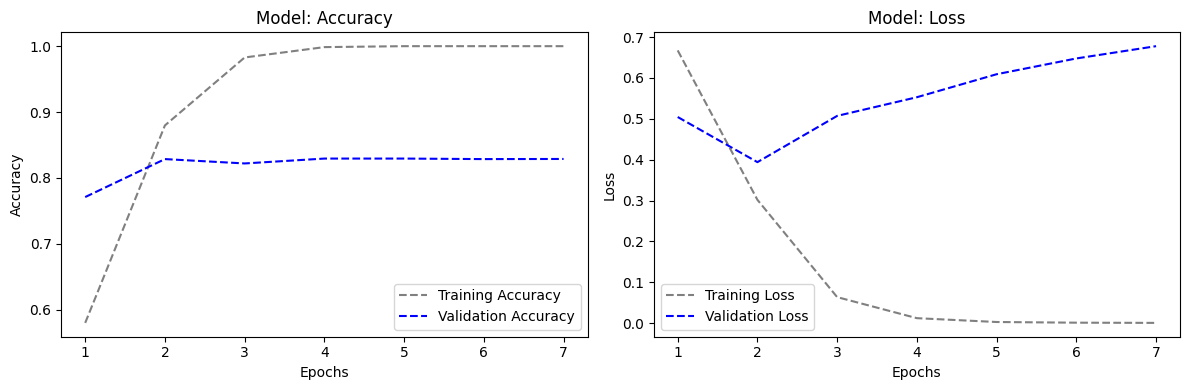

157/157 [==============================] - 1s 7ms/step - loss: 0.3728 - acc: 0.8348
Test Loss: 0.3728
Test Accuracy: 83.48%


In [ ]:
# Please extract the accuracy and loss values from the history object.
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the curves for training and validation, please.
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Model: Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model: Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# printing the metrices values
test_loss, test_accuracy = model.evaluate(test_texts, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

**I went to the larger embedding vector size of 50 to squeeze out the most accurate word representation. Used a filter size of 5 to get 64 filters to retrieve the details. Utilized Adam optimizer with a learning rate of 1e-4. We start from an accuracy of 58% at random initialization, and it slowly improves and reaches 100% over epochs. A sudden rapid increase in training correctness confirms that the model is capable of fitting the training set well. The validation accuracy proceeds the same trend to be up to 83.48%. While it is better, the model's performance on validation data is slightly surpassing randomization expectation level. The model presents a similar behavior pattern to the previous one, including a danger of overfitting. In comparison, increasing the embedding vector size and filter size was not useful for improving generalization.**

**The Conv1D and Embedding layers are utilized, with modifications made to the embedding vector.**

In [ ]:
# Establishing the maximum number of words to utilize in the vocabulary
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Trim the reviews to 150 words.
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Merge the training and testing data to form a unified dataset.
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Dividing the data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=35000, test_size=10000, random_state=42, stratify=labels)

# Additionally divide the data to achieve a test size of 5000 samples.
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

In [ ]:
# Defining the model utilizing both Embedding and Conv1D layers.( Pretrained word embedding)
embedding_dim = 10000  # Enhanced embedding dimension
filter_size = 3
num_filters = 128  # Filters increased to 128

model = Sequential([
    # Embedding layer for word-to-vector conversion
    Embedding(10000, 14, input_length=maxlen),

  Conv1D(512, 3, activation='relu'),
  Dropout(0.5),
  MaxPooling1D(2),

  Conv1D(256, 3, activation='relu'),
  Dropout(0.5),
  MaxPooling1D(2),

  Conv1D(128, 3, activation='relu'),
  Dropout(0.5),
  MaxPooling1D(2),

    # Utilize a Flatten layer to transform the 1D output into a 2D tensor.
    GlobalMaxPooling1D(),
    # Dense layer with sigmoid activation for binary classification
    Dense(512, activation='relu'),  # Reduced units to 512
    Dropout(0.5),
    # Dense layer with sigmoid activation used for binary classification.
    Dense(256, activation='relu'),  # Reduced units to 256
    Dropout(0.5),
    Dense(128, activation='relu'),  # Reduced units to 128
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

from tensorflow.keras import optimizers

# Model compilling using a reduced learning rate.
adam = optimizers.Adam(learning_rate=0.0002)  # Reduced learning rate
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])

In [ ]:
# Train the model
history = model.fit(train_texts, train_labels, epochs=50, batch_size=32, validation_data=(val_texts, val_labels), callbacks=[early_stopping])


Epoch 1/50
1094/1094 [==============================] - 255s 231ms/step - loss: 0.6936 - acc: 0.4991 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/50
1094/1094 [==============================] - 250s 229ms/step - loss: 0.5091 - acc: 0.7195 - val_loss: 0.4953 - val_acc: 0.8404
Epoch 3/50
1094/1094 [==============================] - 251s 229ms/step - loss: 0.3022 - acc: 0.8750 - val_loss: 0.4289 - val_acc: 0.8649
Epoch 4/50
1094/1094 [==============================] - 250s 229ms/step - loss: 0.2465 - acc: 0.9034 - val_loss: 0.3916 - val_acc: 0.8643
Epoch 5/50
1094/1094 [==============================] - 257s 235ms/step - loss: 0.2121 - acc: 0.9185 - val_loss: 0.3833 - val_acc: 0.8600
Epoch 6/50
1094/1094 [==============================] - 248s 226ms/step - loss: 0.1828 - acc: 0.9320 - val_loss: 0.3528 - val_acc: 0.8597
Epoch 7/50
1094/1094 [==============================] - 260s 237ms/step - loss: 0.1591 - acc: 0.9428 - val_loss: 0.3648 - val_acc: 0.8399
Epoch 8/50
1094/1094 [============

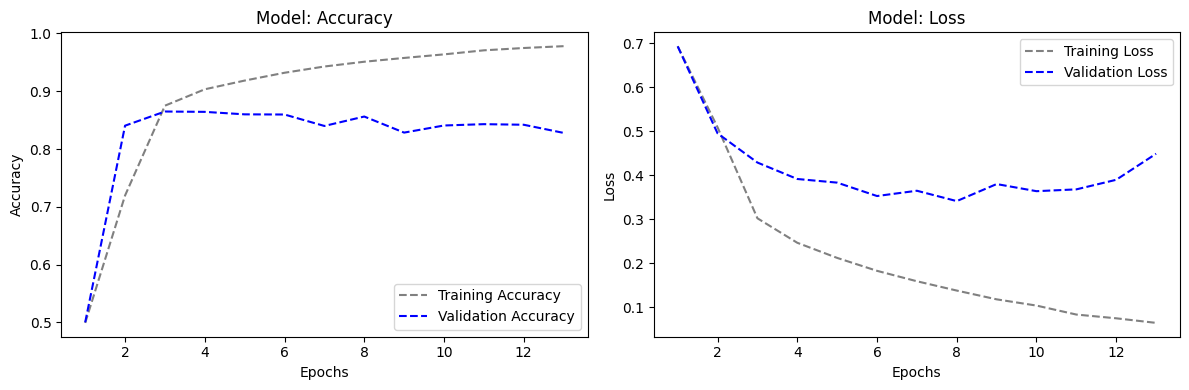

157/157 [==============================] - 7s 46ms/step - loss: 0.2356 - acc: 0.9314
Test Loss: 0.2356
Test Accuracy: 93.14%


In [ ]:
# Retrieve accuracy and loss values from the history object
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Visualizing the training and validation curves.
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Model: Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model: Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# plotting the model's performances
test_loss, test_accuracy = model.evaluate(test_texts, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

**A large embedding dimension of 10,000 is utilized for word representation. The architecture includes three convolutional layers with increasing filter sizes: 512, 256, and 128. Dropout is applied after each convolutional layer to mitigate overfitting, and MaxPooling1D layers are introduced to downsample spatial dimensions. The model achieves a training accuracy of approximately 97.80% and a validation accuracy of around 82.79%. Notably, test accuracy reaches 93.14%. The presence of Dropout layers effectively controls overfitting, evidenced by the minimal disparity between training and validation accuracies. This high accuracy across both training and validation sets indicates a well-balanced model complexity and generalization capability. The test accuracy of 93.14% further underscores the model's ability to generalize to unseen data.**

** **

**Taking RNN and Transformer models**

Simple RNN

In [ ]:
from tensorflow.keras.layers import SimpleRNN

In [ ]:

# Defining the maximum vocabulary size
num_words = 10000

# Retrieving the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Limit reviews to 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Defining the basic RNN model
embedding_dim = 10

model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),
    SimpleRNN(units=64),
    Dense(1, activation='sigmoid')
])


In [ ]:

#Model compilling
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [ ]:
# Train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=128, validation_data=(test_data, test_labels))



Epoch 1/10
196/196 [==============================] - 14s 62ms/step - loss: 0.6881 - acc: 0.5350 - val_loss: 0.6699 - val_acc: 0.5944
Epoch 2/10
196/196 [==============================] - 12s 61ms/step - loss: 0.4867 - acc: 0.7664 - val_loss: 0.3679 - val_acc: 0.8457
Epoch 3/10
196/196 [==============================] - 12s 60ms/step - loss: 0.3171 - acc: 0.8683 - val_loss: 0.3623 - val_acc: 0.8464
Epoch 4/10
196/196 [==============================] - 12s 62ms/step - loss: 0.2537 - acc: 0.9017 - val_loss: 0.4020 - val_acc: 0.8360
Epoch 5/10
196/196 [==============================] - 14s 72ms/step - loss: 0.2080 - acc: 0.9224 - val_loss: 0.4119 - val_acc: 0.8413
Epoch 6/10
196/196 [==============================] - 12s 62ms/step - loss: 0.1514 - acc: 0.9467 - val_loss: 0.4581 - val_acc: 0.8326
Epoch 7/10
196/196 [==============================] - 12s 62ms/step - loss: 0.1308 - acc: 0.9542 - val_loss: 0.5542 - val_acc: 0.8181
Epoch 8/10
196/196 [==============================] - 12s 62ms

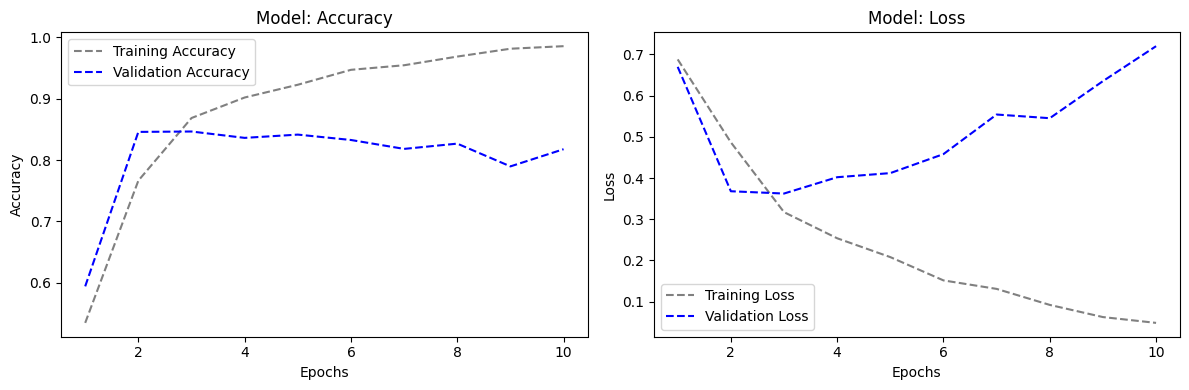

782/782 [==============================] - 7s 9ms/step - loss: 0.7202 - acc: 0.8176
Test accuracy: 0.8175600171089172


In [ ]:

# Retrieve accuracy and loss values from the history object
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Displaying the training and validation curves
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Model: Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model: Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# plotting the model with metrices
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

**LSTM Model**

In [ ]:
# Establishing the maximum number of words to utilize in the vocabulary
num_words = 10000

# loading the IMDB dataset.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Truncate the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Specifying the LSTM model with multiple layers and activations
embedding_dim = 10

model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),

    # Initial LSTM layer employing tanh activation
    LSTM(units=64, return_sequences=True, activation='tanh'),

    # Utilizing ReLU activation in the second LSTM layer
    LSTM(units=32, return_sequences=True, activation='relu'),

    # Adding a third LSTM layer with sigmoid activation
    LSTM(units=16),

    # Sigmoid activation used for binary classification in the output layer.
    Dense(1, activation='sigmoid')
])



In [ ]:
# Model compilling
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [ ]:

# Model training phase
history = model.fit(train_data, train_labels, epochs=10, batch_size=128, validation_data=(test_data, test_labels))


Epoch 1/10
196/196 [==============================] - 113s 553ms/step - loss: 0.4954 - acc: 0.7330 - val_loss: 0.3374 - val_acc: 0.8540
Epoch 2/10
196/196 [==============================] - 91s 463ms/step - loss: 0.4572 - acc: 0.7872 - val_loss: 0.4088 - val_acc: 0.8208
Epoch 3/10
196/196 [==============================] - 108s 551ms/step - loss: 0.3167 - acc: 0.8712 - val_loss: 0.3877 - val_acc: 0.8293
Epoch 4/10
196/196 [==============================] - 109s 558ms/step - loss: 0.2669 - acc: 0.8980 - val_loss: 0.4104 - val_acc: 0.8285
Epoch 5/10
196/196 [==============================] - 107s 549ms/step - loss: 0.2313 - acc: 0.9166 - val_loss: 0.4124 - val_acc: 0.8253
Epoch 6/10
196/196 [==============================] - 108s 554ms/step - loss: 0.2094 - acc: 0.9278 - val_loss: 0.4411 - val_acc: 0.8225
Epoch 7/10
196/196 [==============================] - 108s 552ms/step - loss: 0.1867 - acc: 0.9394 - val_loss: 0.4900 - val_acc: 0.8224
Epoch 8/10
196/196 [=============================

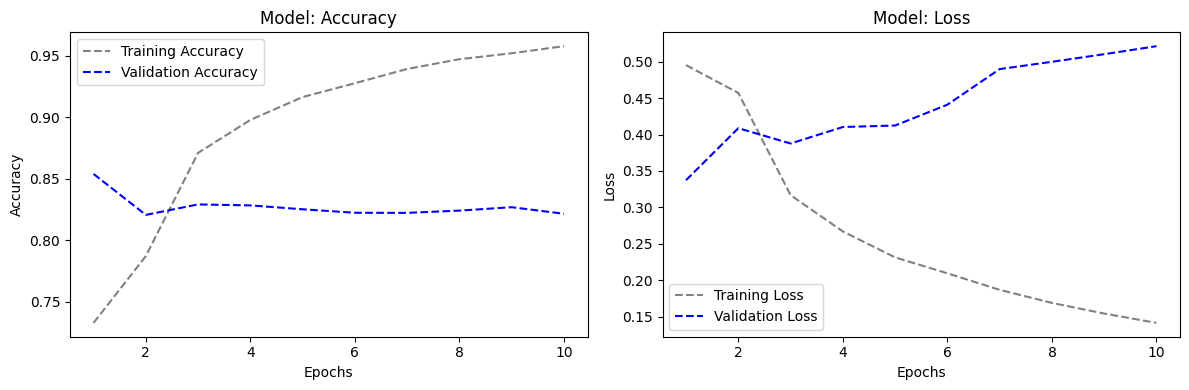

782/782 [==============================] - 35s 44ms/step - loss: 0.5214 - acc: 0.8217
Test accuracy: 0.8216800093650818


In [ ]:

# Retrieve accuracy and loss values from the history object
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

#Plotting the curves for training and validation.
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Model: Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model: Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# PLotting the metrices on graph
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)